In [1]:
# 'Harcoding filter into data:'
# filt_z = copy.deepcopy(radar.fields['reflectivity'])
# filt_z['data'] = np.ma.masked_where(nukem.gate_excluded, filt_z['data'].data)
# radar.add_field('filtered_reflectvity', filt_z, replace_existing=True)

In [2]:
%matplotlib inline

import imp
import copy
import matplotlib
import matplotlib.pyplot as pl
import numpy as np
import pyart

In [3]:
sound_dir = "/data/vlouf/data/soudings_netcdf/"
fd = "cfrad.20070129_205009.000_to_20070129_205810.000_CPOL_PPI_level1a.nc"
radar = pyart.io.read(fd)

radar_codes = imp.load_source('radar_codes', 'radar_codes.py')

In [4]:
gr = pyart.graph.RadarDisplay(radar)

# Raw data

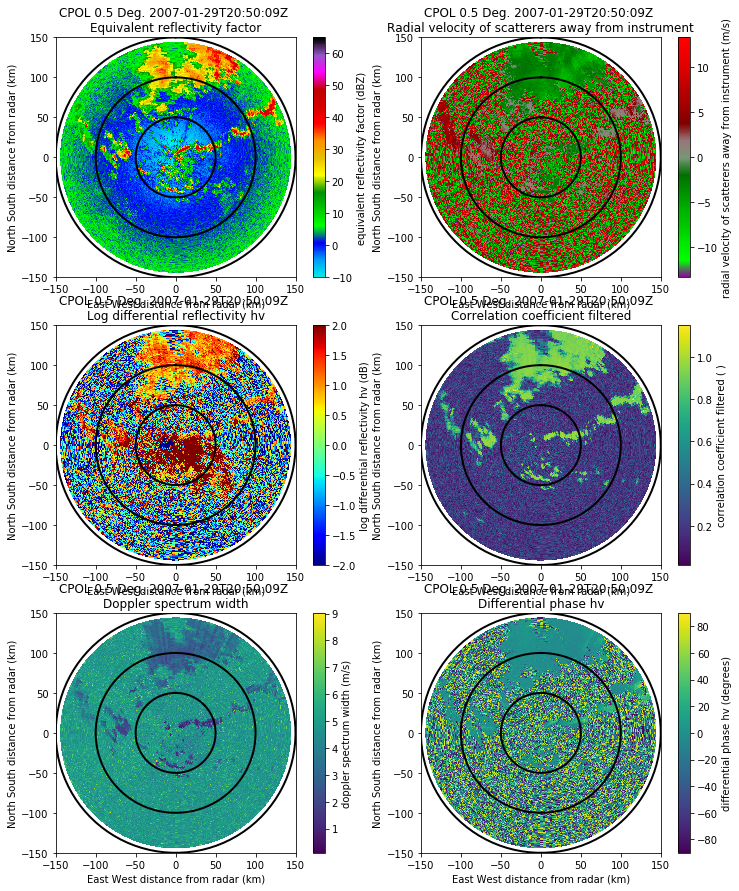

In [5]:
xy = (-150, 150, -150, 150)

fig, the_ax = pl.subplots(3, 2, figsize=(12, 15))
the_ax = the_ax.flatten()

gr.plot_ppi('DBZ', sweep=0, ax=the_ax[0])
gr.plot_ppi('VEL', sweep=0, ax=the_ax[1], cmap=pyart.graph.cm.NWSVel)
gr.plot_ppi('ZDR', sweep=0, ax=the_ax[2], vmin=-2, vmax=2, cmap='jet')
gr.plot_ppi('RHOHV', sweep=0, ax=the_ax[3])
gr.plot_ppi('WIDTH', sweep=0, ax=the_ax[4])
gr.plot_ppi('PHIDP', sweep=0, ax=the_ax[5])

for ax_sl in the_ax:
    gr.plot_range_rings([50, 100, 150], ax=ax_sl)
    ax_sl.axis('square')
    ax_sl.axis(xy)

# pl.tight_layout()
pl.show()


# First basic filter.

Keeping reflectivities only inside the interval $-20 < Z_m (dBZ) < 90$, and excluding cross correlation coefficients below $\rho_{hv} < 0.5$.

In [6]:
gf = pyart.filters.GateFilter(radar)
gf.exclude_outside('DBZ', -20, 90)
gf.exclude_below('RHOHV', 0.5)

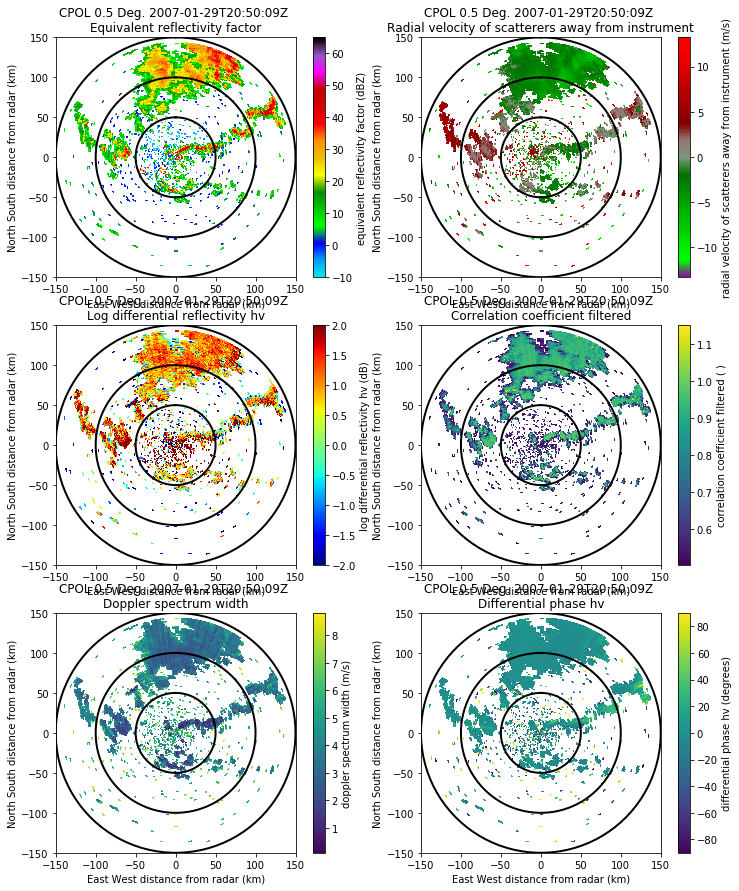

In [7]:
xy = (-150, 150, -150, 150)

fig, the_ax = pl.subplots(3, 2, figsize=(12, 15))
the_ax = the_ax.flatten()

gr.plot_ppi('DBZ', sweep=0, gatefilter=gf, ax=the_ax[0])
gr.plot_ppi('VEL', sweep=0, gatefilter=gf, ax=the_ax[1], cmap=pyart.graph.cm.NWSVel)
gr.plot_ppi('ZDR', sweep=0, gatefilter=gf, ax=the_ax[2], vmin=-2, vmax=2, cmap='jet')
gr.plot_ppi('RHOHV', sweep=0, gatefilter=gf, ax=the_ax[3])
gr.plot_ppi('WIDTH', sweep=0, gatefilter=gf, ax=the_ax[4])
gr.plot_ppi('PHIDP', sweep=0, gatefilter=gf, ax=the_ax[5])

for ax_sl in the_ax:
    gr.plot_range_rings([50, 100, 150], ax=ax_sl)
    ax_sl.axis('square')
    ax_sl.axis(xy)

# pl.tight_layout()
pl.show()


# Despeckle

In [8]:
gf_despeckeld = pyart.correct.despeckle_field(radar, 'DBZ', gatefilter=gf)

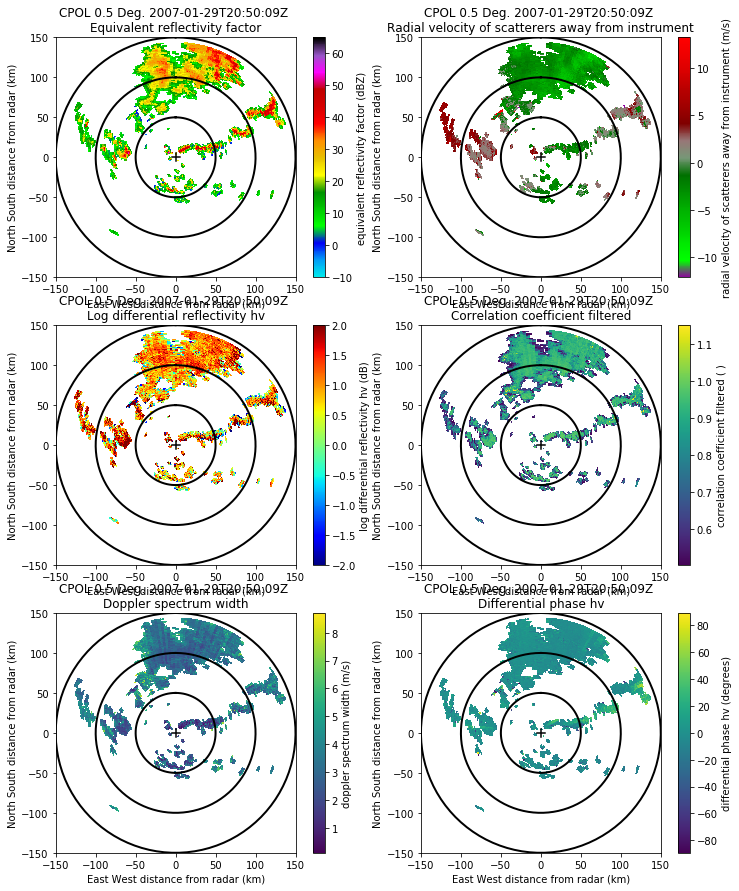

In [9]:
xy = (-150, 150, -150, 150)

fig, the_ax = pl.subplots(3, 2, figsize=(12, 15))
the_ax = the_ax.flatten()

gr.plot_ppi('DBZ', sweep=0, gatefilter=gf_despeckeld, ax=the_ax[0])
gr.plot_ppi('VEL', sweep=0, gatefilter=gf_despeckeld, ax=the_ax[1], cmap=pyart.graph.cm.NWSVel)
gr.plot_ppi('ZDR', sweep=0, gatefilter=gf_despeckeld, ax=the_ax[2], vmin=-2, vmax=2, cmap='jet')
gr.plot_ppi('RHOHV', sweep=0, gatefilter=gf_despeckeld, ax=the_ax[3])
gr.plot_ppi('WIDTH', sweep=0, gatefilter=gf_despeckeld, ax=the_ax[4])
gr.plot_ppi('PHIDP', sweep=0, gatefilter=gf_despeckeld, ax=the_ax[5])

for ax_sl in the_ax:
    gr.plot_range_rings([50, 100, 150], ax=ax_sl)
    gr.plot_cross_hair(5, ax=ax_sl)
    ax_sl.axis('square')
    ax_sl.axis(xy)

# pl.tight_layout()
pl.show()


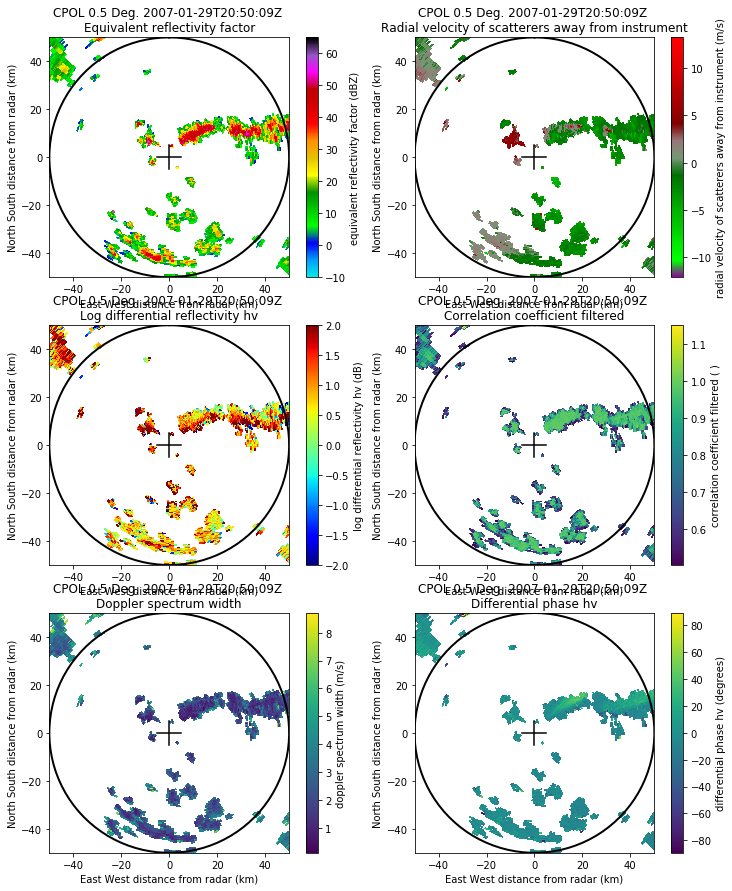

In [10]:
xy = (-50, 50, -50, 50)

fig, the_ax = pl.subplots(3, 2, figsize=(12, 15))
the_ax = the_ax.flatten()

gr.plot_ppi('DBZ', sweep=0, gatefilter=gf_despeckeld, ax=the_ax[0])
gr.plot_ppi('VEL', sweep=0, gatefilter=gf_despeckeld, ax=the_ax[1], cmap=pyart.graph.cm.NWSVel)
gr.plot_ppi('ZDR', sweep=0, gatefilter=gf_despeckeld, ax=the_ax[2], vmin=-2, vmax=2, cmap='jet')
gr.plot_ppi('RHOHV', sweep=0, gatefilter=gf_despeckeld, ax=the_ax[3])
gr.plot_ppi('WIDTH', sweep=0, gatefilter=gf_despeckeld, ax=the_ax[4])
gr.plot_ppi('PHIDP', sweep=0, gatefilter=gf_despeckeld, ax=the_ax[5])

for ax_sl in the_ax:
    gr.plot_range_rings([50, 100, 150], ax=ax_sl)
    gr.plot_cross_hair(5, ax=ax_sl)
    ax_sl.axis('square')
    ax_sl.axis(xy)

# pl.tight_layout()
pl.show()


# Radiosondages

In [11]:
z_dict, temp_dict, snr = radar_codes.snr_and_sounding(radar, sound_dir, 'DBZ')

In [12]:
nyquist_velocity = radar.instrument_parameters['nyquist_velocity']['data'][0]
texture =  radar_codes.get_texture(radar, 'VEL', nyquist_velocity)  #Takes time

170.0510995388031


In [13]:
ncp = np.zeros_like(snr['data']) + 1  # Fake NCP field

In [14]:
radar.add_field('sounding_temperature', temp_dict, replace_existing = True)
radar.add_field('height', z_dict, replace_existing = True)
radar.add_field('SNR', snr, replace_existing = True)

radar.add_field('velocity_texture', texture, replace_existing = True) 
radar.add_field_like('SNR', 'normalized_coherent_power', ncp, replace_existing = True)  # Fake NCP Field

In [15]:
radar.add_field('cross_correlation_ratio', radar.fields['RHOHV'])

In [16]:
my_fuzz, cats = radar_codes.do_my_fuzz(radar)


Doing multi_trip
Doing rain
Doing snow
Doing no_scatter
Doing melting
Doing hard constraining  melting
(array([   0,    0,    0, ..., 4113, 4113, 4113]), array([ 0,  1,  2, ..., 14, 15, 16]))
Doing hard constraining  multi_trip
(array([1210, 1210, 1210, ..., 4113, 4113, 4113]), array([411, 412, 413, ..., 477, 478, 479]))
Doing hard constraining  melting
(array([ 484,  484,  484, ..., 4113, 4113, 4113]), array([473, 474, 475, ..., 477, 478, 479]))


In [17]:
radar.add_field('gate_id', my_fuzz, replace_existing = True)

In [18]:
gr = pyart.graph.RadarDisplay(radar)

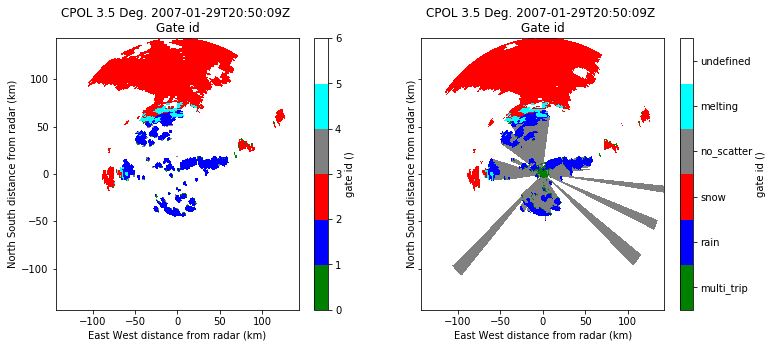

In [19]:
sw = 0
lab_colors = ['green', 'blue', 'red', 'gray', 'cyan', 'white' ]
cmap = matplotlib.colors.ListedColormap(lab_colors)

fig, (ax0, ax1) = pl.subplots(1, 2, figsize = (12, 5), sharey=True)
gr.plot_ppi('gate_id', gatefilter=gf_despeckeld, sweep = 4, cmap = cmap, vmin = 0, vmax = 6, ax=ax0)
# tick_locs = np.arange(0, 6, 1) +0.5
# gr.cbs[-1].locator = matplotlib.ticker.FixedLocator(tick_locs)
# gr.cbs[-1].formatter = matplotlib.ticker.FixedFormatter(['multi_trip', 'rain', 'snow', 'no_scatter', 'melting', 'undefined'])
# gr.cbs[-1].update_ticks()

gr.plot_ppi('gate_id', sweep =4, cmap = cmap, vmin = 0, vmax = 6, ax=ax1)
tick_locs = np.arange(0, 6, 1) +0.5
gr.cbs[-1].locator = matplotlib.ticker.FixedLocator(tick_locs)
gr.cbs[-1].formatter = matplotlib.ticker.FixedFormatter(['multi_trip', 'rain', 'snow', 'no_scatter', 'melting', 'undefined'])
gr.cbs[-1].update_ticks()

pl.show()

In [20]:
rain_and_snow = pyart.correct.GateFilter(radar)
rain_and_snow.exclude_all()
rain_and_snow.include_equal('gate_id', 1)
rain_and_snow.include_equal('gate_id', 2)
rain_and_snow.include_equal('gate_id', 4)

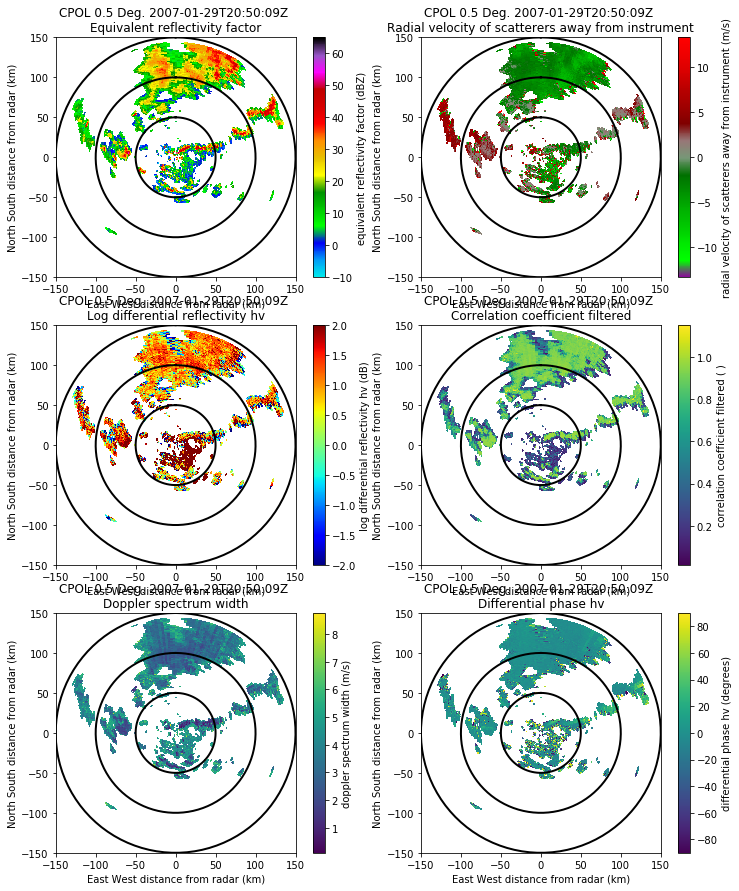

In [21]:
xy = (-150, 150, -150, 150)

fig, the_ax = pl.subplots(3, 2, figsize=(12, 15))
the_ax = the_ax.flatten()

gr.plot_ppi('DBZ', sweep=0, gatefilter=rain_and_snow, ax=the_ax[0])
gr.plot_ppi('VEL', sweep=0, gatefilter=rain_and_snow, ax=the_ax[1], cmap=pyart.graph.cm.NWSVel)
gr.plot_ppi('ZDR', sweep=0, gatefilter=rain_and_snow, ax=the_ax[2], vmin=-2, vmax=2, cmap='jet')
gr.plot_ppi('RHOHV', sweep=0, gatefilter=rain_and_snow, ax=the_ax[3])
gr.plot_ppi('WIDTH', sweep=0, gatefilter=rain_and_snow, ax=the_ax[4])
gr.plot_ppi('PHIDP', sweep=0, gatefilter=rain_and_snow, ax=the_ax[5])

for ax_sl in the_ax:
    gr.plot_range_rings([50, 100, 150], ax=ax_sl)
    ax_sl.axis('square')
    ax_sl.axis(xy)

# pl.tight_layout()
pl.show()


# Comparison filtering method.

(Left) my simple method. (Right) The fuzzy logic method.

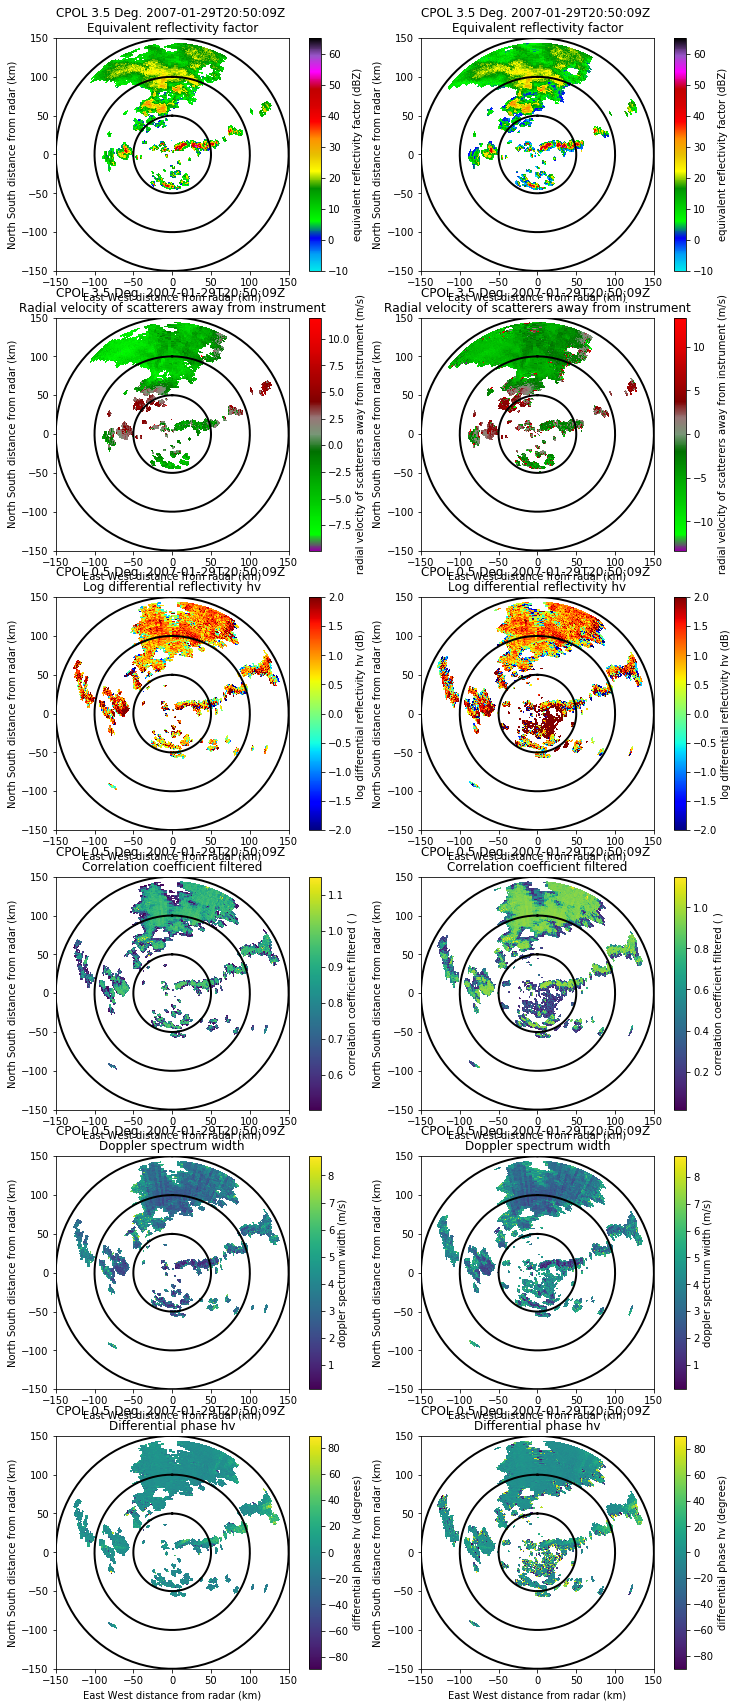

In [22]:
xy = (-150, 150, -150, 150)

fig, the_ax = pl.subplots(6, 2, figsize=(12, 30))
the_ax = the_ax.flatten()

gr.plot_ppi('DBZ', sweep=4, gatefilter=gf_despeckeld, ax=the_ax[0])
gr.plot_ppi('DBZ', sweep=4, gatefilter=rain_and_snow, ax=the_ax[1])

gr.plot_ppi('VEL', sweep=4, gatefilter=gf_despeckeld, ax=the_ax[2], cmap=pyart.graph.cm.NWSVel)
gr.plot_ppi('VEL', sweep=4, gatefilter=rain_and_snow, ax=the_ax[3], cmap=pyart.graph.cm.NWSVel)

gr.plot_ppi('ZDR', sweep=0, gatefilter=gf_despeckeld, ax=the_ax[4], vmin=-2, vmax=2, cmap='jet')
gr.plot_ppi('ZDR', sweep=0, gatefilter=rain_and_snow, ax=the_ax[5], vmin=-2, vmax=2, cmap='jet')

gr.plot_ppi('RHOHV', sweep=0, gatefilter=gf_despeckeld, ax=the_ax[6])
gr.plot_ppi('RHOHV', sweep=0, gatefilter=rain_and_snow, ax=the_ax[7])

gr.plot_ppi('WIDTH', sweep=0, gatefilter=gf_despeckeld, ax=the_ax[8])
gr.plot_ppi('WIDTH', sweep=0, gatefilter=rain_and_snow, ax=the_ax[9])

gr.plot_ppi('PHIDP', sweep=0, gatefilter=gf_despeckeld, ax=the_ax[10])
gr.plot_ppi('PHIDP', sweep=0, gatefilter=rain_and_snow, ax=the_ax[11])

for ax_sl in the_ax:
    gr.plot_range_rings([50, 100, 150], ax=ax_sl)
    ax_sl.axis('square')
    ax_sl.axis(xy)

# pl.tight_layout()
pl.show()


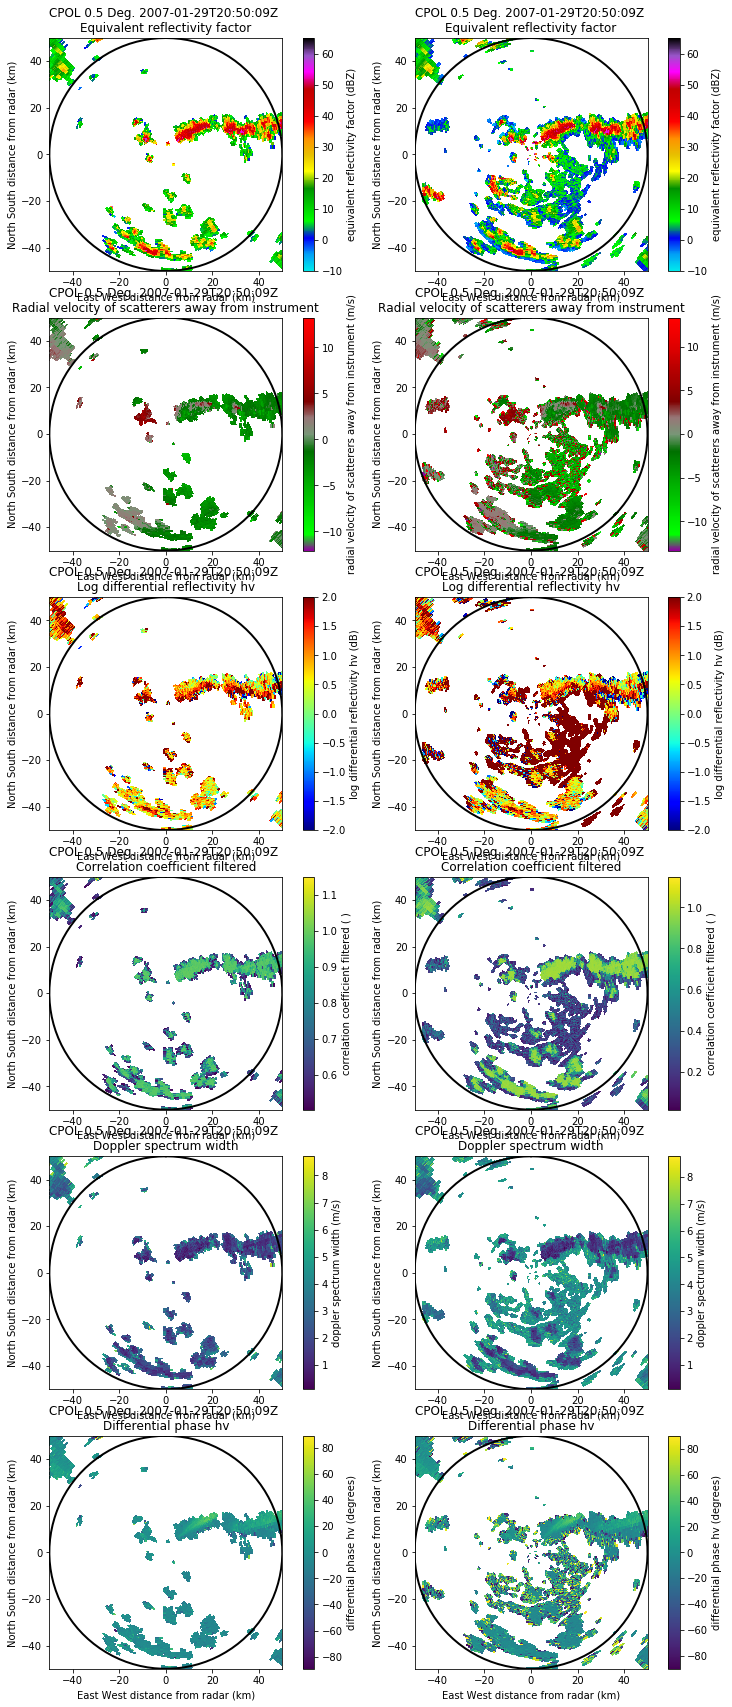

In [23]:
xy = (-50, 50, -50, 50)

fig, the_ax = pl.subplots(6, 2, figsize=(12, 30))
the_ax = the_ax.flatten()

gr.plot_ppi('DBZ', sweep=0, gatefilter=gf_despeckeld, ax=the_ax[0])
gr.plot_ppi('DBZ', sweep=0, gatefilter=rain_and_snow, ax=the_ax[1])

gr.plot_ppi('VEL', sweep=0, gatefilter=gf_despeckeld, ax=the_ax[2], cmap=pyart.graph.cm.NWSVel)
gr.plot_ppi('VEL', sweep=0, gatefilter=rain_and_snow, ax=the_ax[3], cmap=pyart.graph.cm.NWSVel)

gr.plot_ppi('ZDR', sweep=0, gatefilter=gf_despeckeld, ax=the_ax[4], vmin=-2, vmax=2, cmap='jet')
gr.plot_ppi('ZDR', sweep=0, gatefilter=rain_and_snow, ax=the_ax[5], vmin=-2, vmax=2, cmap='jet')

gr.plot_ppi('RHOHV', sweep=0, gatefilter=gf_despeckeld, ax=the_ax[6])
gr.plot_ppi('RHOHV', sweep=0, gatefilter=rain_and_snow, ax=the_ax[7])

gr.plot_ppi('WIDTH', sweep=0, gatefilter=gf_despeckeld, ax=the_ax[8])
gr.plot_ppi('WIDTH', sweep=0, gatefilter=rain_and_snow, ax=the_ax[9])

gr.plot_ppi('PHIDP', sweep=0, gatefilter=gf_despeckeld, ax=the_ax[10])
gr.plot_ppi('PHIDP', sweep=0, gatefilter=rain_and_snow, ax=the_ax[11])

for ax_sl in the_ax:
    gr.plot_range_rings([50, 100, 150], ax=ax_sl)
    ax_sl.axis('square')
    ax_sl.axis(xy)

# pl.tight_layout()
pl.show()
